# My Data Science Capstone Project

<h2>Oaxacan Restaurant in Mexico City!</h2>
Traditional Food and Mezcal

Introduction/Business Problem

The main idea in this project is to define the best place to establish an Oaxacan Restaurant in Mexico City.
Oaxaca is a state located in the south of the country and traditionally has been characterized by its   cultural and gastronomic richness, which many visitors and tourists have been delighted during the to visit the Oaxaca City.
Oaxaca has 8 geographical regions, most of these regions are populated by indigenous culture and they have developed clear differences among them in their traditions, dress, languages, and food.
The restaurant will offer in the menu with five classical Oaxacan Food daily; but additionally, will also be available seasonal menu and it will change monthly. The seasonal menu will be a representative dish from one specific region.


-------------------------------------------------------------------------

Describe the data that you will be using to solve the problem or execute your idea

In order to develop analysis to make the best decision we have to analyze the geographical region in Mexico City; we have to choose the districts located in the center of city. We will start exploring the geographical zones and identify the types of establishments that there are in the goal zone, we will be focused on Traditional Oaxacan Restaurants using information from Foursquare API.
We will search for information in the institutions and government offices like Secretary of Economy and National Institute of Statistics and Geographical information (INEGI) to identify the types of establishments and business created in the Mexico City, and this will be used as a complement of Foursquare’s information.


In [34]:
print('This is the first week of the Capstone Project')

This is the first week of the Capstone Project


In [10]:
#Importing required packages
import folium
import pandas as pd
import numpy as np  # useful for many scientific computing in Python
import matplotlib.pylab as plt

Firstly to get the required information we moved to INEGI Wab page "https://www.inegi.org.mx/app/mapa/denue/" and we selected Mexico City.
we could get the following information and with these data we started the project.

The Data Set contains 476853 records and 41 Columns:
        ID,
NOM_ESTAB,
RAZ_SOCIAL,
CODIGO_ACT,
NOMBRE_ACT,
PER_OCU,
TIPO_VIAL,
NOM_VIAL,
TIPO_V_E_1,
NOM_V_E_1,
TIPO_V_E_2,
NOM_V_E_2,
TIPO_V_E_3,
NOM_V_E_3,
NUMERO_EXT,
LETRA_EXT,
EDIFICIO,
EDIFICIO_E,
NUMERO_INT,
LETRA_INT,
TIPO_ASENT,
NOMB_ASENT,
TIPOCENCOM,
NOM_CENCOM,
NUM_LOCAL,
COD_POSTAL,
CVE_ENT,
ENTIDAD,
CVE_MUN,
MUNICIPIO,
CVE_LOC,
LOCALIDAD,
AGEB,
MANZANA,
TELEFONO,
CORREOELEC,
WWW,
TIPOUNIECO,
LATITUD,
LONGITUD,
FECHA_ALTA

I Could not upload the file because it is so heavy~300MB

*Before the following Analysis I worked a lot on data cleaning, standardization and Data Quality, at the end I summarized the information by District.* 
I used SQL and SAS Language to developed the previous tasks

### I summarized the business by district and the create a Bar Chart to visualize the quantity of business in each District

In [23]:
filename=r"DISTRICT_B.csv"
df = pd.read_csv(filename)

In [24]:
df_=df.set_index('DISTRICT')
df_

,NEGOCIOS
DISTRICT,
MILPA_ALTA,6582
LA_MAGDALENA_CONTRERAS,7103
CUAJIMALPA,8404
TLAHUAC,16760
IZTACALCO,19184


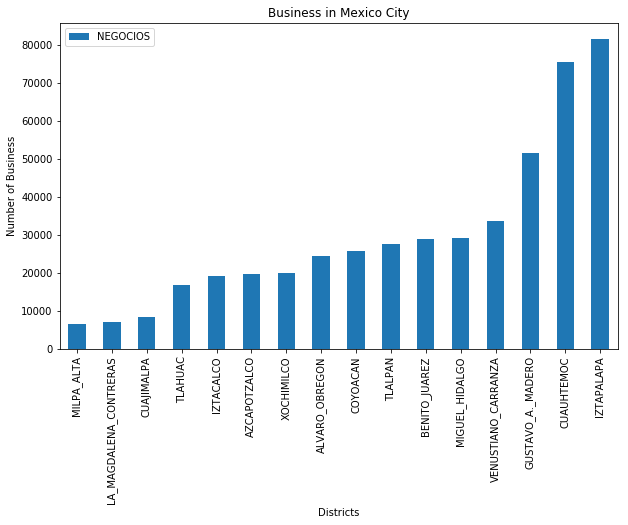

In [25]:
# step 2: plot data
df_.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Districts') # add to x-label to the plot
plt.ylabel('Number of Business') # add y-label to the plot
plt.title('Business in Mexico City') # add title to the plot

plt.show()

In [33]:
df.head()

,DISTRICT,NEGOCIOS
0,MILPA_ALTA,6582
1,LA_MAGDALENA_CONTRERAS,7103
2,CUAJIMALPA,8404
3,TLAHUAC,16760
4,IZTACALCO,19184


# Localization Information

We needed the shapes or points of each polygon for all districts and the perimeter for Mexico City; we moved to "https://www.inegi.org.mx/app/mapas/" and fortunately we got the information.
The problem was the information was hard to manipulate, because i got an raw file with more than 200,000 characters by record with 20,000 points for the shapes.

I used SQL and SAS Language with different advanced techniques to manipulate the data, and finaly I developed the Json files to use with folium packages to show the maps.


In [36]:
df_geo = r'cdmx.json' # geojson file CDMX
cdmx_geo = r'CDMX_ALC.json' # geojson file CDMX by DISTRICTS

### I used the Json file to show the perimeter of Mexico City

In [54]:
#19.4345749,-99.1330427
cdmx_map = folium.Map(location=[19.3191917,-99.1546748], zoom_start=11)
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
cdmx_map.choropleth(
    geo_data=df_geo,
    data=df,
    columns=['DISTRICT', 'NEGOCIOS'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Perimeter of Mexico City'
)
# display map
cdmx_map

### Analyzing Restaurants

In [43]:
file_rest=r"DIST_REST.csv"
df_rest = pd.read_csv(file_rest)

In [55]:
df_rest

,DISTRICT,REST
0,MILPA_ALTA,453
1,LA_MAGDALENA_CONTRERAS,600
2,CUAJIMALPA,707
3,TLAHUAC,1115
4,XOCHIMILCO,1393
5,IZTACALCO,1888
6,AZCAPOTZALCO,2066
7,ALVARO_OBREGON,2166
8,COYOACAN,2390
9,TLALPAN,2408


In [56]:
# create map and display it
rest_map = folium.Map(location=[19.3191917,-99.1546748], zoom_start=11)

rest_map.choropleth(
    geo_data=cdmx_geo,
    data=df_rest,
    columns=['DISTRICT', 'REST'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Restaurants by District in Mexico City'
)
# display map
rest_map

### Analizing Oaxacan Restaurant

We used the file and we looked up for "oax","mixe","Ayuu","Tlayu","Zapotec" words in the of the Name of the business. These are related to Oaxaca State or to a Oaxacan Region that is why i used it.

*WHERE (UPCASE(NOM_ESTAB) LIKE "%OAX%" OR UPCASE(RAZ_SOCIAL) LIKE "%OAX%" OR UPCASE(NOM_ESTAB) LIKE "%TLAYU%" 
	OR UPCASE(NOM_ESTAB) LIKE "%MIXE%" OR UPCASE(NOM_ESTAB) LIKE "%AYUU%" OR UPCASE(NOM_ESTAB) LIKE "%ZAPOTEC%"   ) ;*

We identitified 107 Records

In [57]:
file_oax=r"OAX_REST.csv"
oax_rest = pd.read_csv(file_oax)
oax_rest.head()

,X,Y,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,MUNI
0,-99.065118,19.453159,819277,ANTOJITOS LA OAXAQUENA,NaN,722513,Restaurantes con servicio de preparaciOn de an...,0 a 5 personas,CALLE,SEGUNDA CERRADA 625,...,2409,4,NaN,NaN,NaN,Fijo,19.453159,-99.065118,01JUL10:00:00:00,GUSTAVO_A._MADERO
1,-99.033574,19.291154,1046979,ANTOJITOS LA OAXAQUENA,NaN,722513,Restaurantes con servicio de preparaciOn de an...,0 a 5 personas,CALLE,LORENZO PEREZ CASTRO,...,065A,5,NaN,NaN,NaN,Fijo,19.291154,-99.033574,01JUL10:00:00:00,TLAHUAC
2,-99.141958,19.303399,990487,ANTOJITOS LA OAXAQUENA COCINA ECONOMICA,NaN,722518,Restaurantes que preparan otro tipo de aliment...,0 a 5 personas,CALLE,EJIDO,...,1425,31,5.556777e+09,NaN,NaN,Fijo,19.303399,-99.141958,01JUL10:00:00:00,COYOACAN
3,-99.044293,19.392201,728046,ANTOJITOS OAXAQUENCES,NaN,722513,Restaurantes con servicio de preparaciOn de an...,0 a 5 personas,CALLE,CORONEL BENITO S. ZENEA,...,0089,5,NaN,NaN,NaN,Fijo,19.392201,-99.044293,01DEC14:00:00:00,IZTAPALAPA
4,-99.097759,19.433072,694951,ANTOJITOS OAXAQUENOS,NaN,722513,Restaurantes con servicio de preparaciOn de an...,0 a 5 personas,CALLE,DEL MERCADO,...,055A,26,5.555717e+09,NaN,NaN,Fijo,19.433072,-99.097759,01DEC14:00:00:00,VENUSTIANO_CARRANZA


In [59]:
oax_rest.shape

(107, 44)

### Summarizing Oaxacan Restaurant

In [60]:
file_summ_oax=r"SUMM_OAX.csv"
oax_summ = pd.read_csv(file_summ_oax)
oax_summ

,DISTRICT,REST
0,MILPA_ALTA,1
1,CUAJIMALPA,1
2,AZCAPOTZALCO,2
3,XOCHIMILCO,3
4,TLALPAN,4
5,ALVARO_OBREGON,4
6,TLAHUAC,4
7,MIGUEL_HIDALGO,5
8,IZTACALCO,5
9,IZTAPALAPA,7


#### We used choropleth Map to show the Distribution of Oaxacan Restaurant by District in  Mexico City

In [61]:
# create map and display it
oax_map = folium.Map(location=[19.3191917,-99.1546748], zoom_start=11)

oax_map.choropleth(
    geo_data=cdmx_geo,
    data=oax_summ,
    columns=['DISTRICT', 'REST'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Oaxacan Restaurants by District in Mexico City'
)
# display map
oax_map

##### For a better visualization we locate each Oaxacan restaurant in the Map, and we add the Name of the Restauran

In [63]:
# instantiate a feature group for the incidents in the dataframe
restaurants = folium.map.FeatureGroup()

# loop through the rest
for lat, lng, in zip(oax_rest.Y, oax_rest.X):
    restaurants.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# add pop-up text to each marker on the map
latitudes = list(oax_rest.Y)
longitudes = list(oax_rest.X)
labels = list(oax_rest.nom_estab)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(oax_map)    
    
# add incidents to map
oax_map.add_child(restaurants)